In [7]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import os

In [8]:
RESOURCES_PATH = '../resources/sounds/'
cargo_path = os.path.join(RESOURCES_PATH, 'cargo.wav')

In [9]:
sampling_freq, data = wavfile.read(cargo_path)
print(data.shape, sampling_freq)

sig_0 = data[:, 0]  # channel 0
sig_1 = data[:, 1]  # channel 1

(1225014, 2) 48000


<ipython-input-9-9d39d2b7dcf0>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_freq, data = wavfile.read(cargo_path)
<ipython-input-9-9d39d2b7dcf0>:1: WavFileWarning: Incomplete chunk ID: b'\x00', ignoring it.
  sampling_freq, data = wavfile.read(cargo_path)


In [10]:
from visualisation_2 import plot_sig, plot_sig_add

# plt.figure(figsize=(15, 10))
# plot_sig_add(data[:, 0], sampling_freq)
# plot_sig_add(data[:, 1], sampling_freq, title='Signal', xlabel='Time [s]', ylabel='Amplitude')
# plt.show()

# plot_sig(data[:, 0], sampling_freq)
# plot_sig(data[:, 1], sampling_freq)

In [11]:
from scipy.fft import rfft, rfftfreq, irfft

N = sig_0.shape[0]
yf = rfft(sig_0)
xf = rfftfreq(N, 1 / sampling_freq)

0.06236469014639073


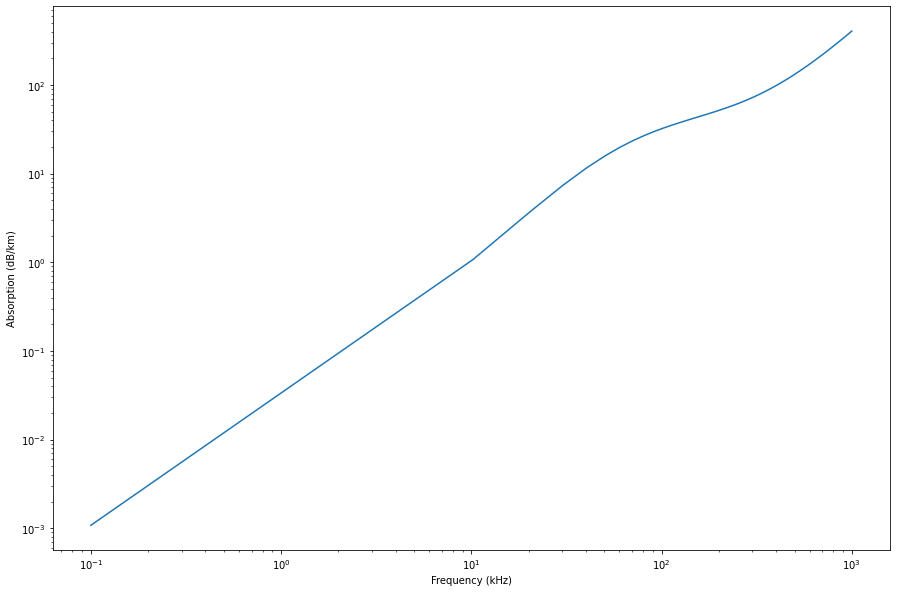

In [12]:
from absorption import absorption

kwargs = {
    'depth': 0.05,
    'temperature': 8,
    'salinity': 35,
    'pH': 8
}
absorption_dbkm = absorption(xf, **kwargs)


distance = 0.01# 10  # in km
absorption_db = absorption_dbkm * distance
absorption_ratio = np.power(10, absorption_db / 20)
# print(1 / absorption_ratio)
yf_absorbed = np.multiply(yf, 1 / absorption_ratio)

Text(0, 0.5, 'Amplitude')

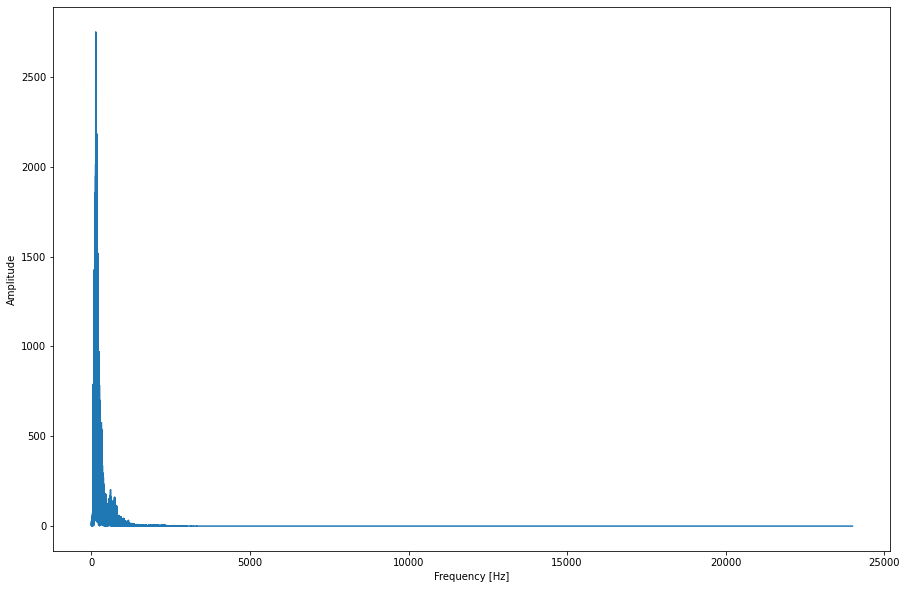

In [50]:
plt.figure(figsize=(15, 10))
# plt.plot(xf[:1000], np.abs(yf_absorbed)[:1000])
plt.plot(xf[:], np.abs(yf_absorbed)[:])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

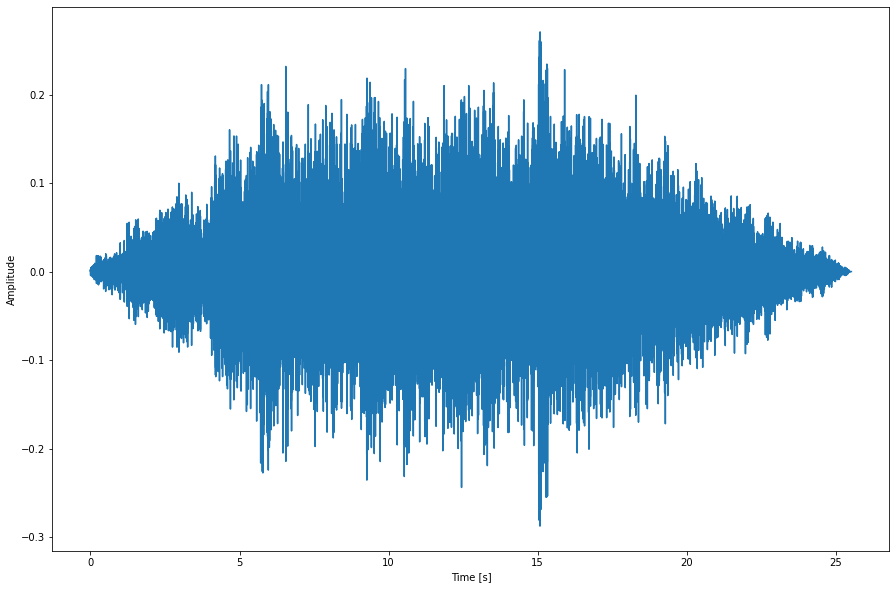

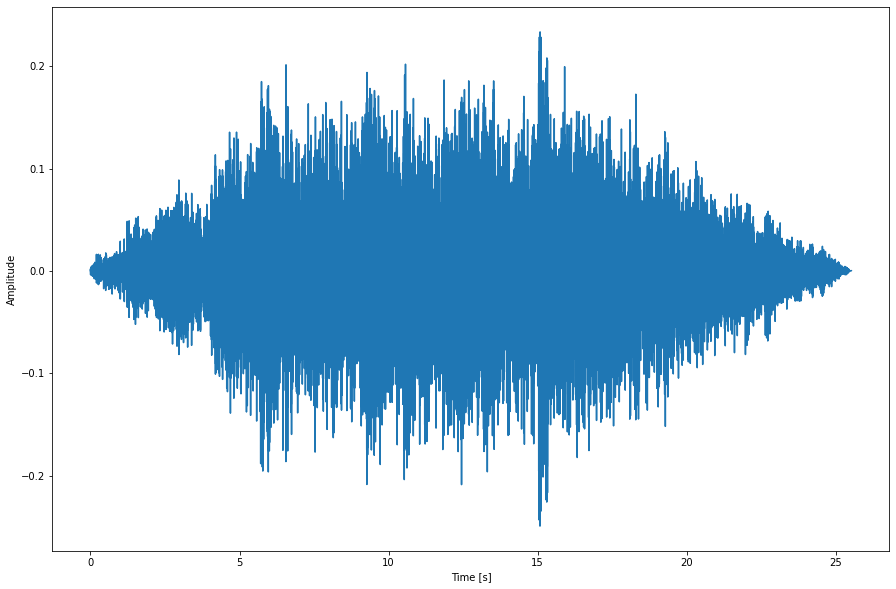

In [44]:
sig_absorbed = irfft(yf_absorbed)
plot_sig(sig_0, sampling_freq)
plot_sig(sig_absorbed, sampling_freq)

In [45]:
wavfile.write('out.wav', sampling_freq, sig_absorbed)

In [1]:
from physics.units import DimensionedValue

dv1 = DimensionedValue(10, 'kg')
dv2 = DimensionedValue(9, 'kg')

dv3 = DimensionedValue(7, ('kg', 1), ('m', 2))

dv1
dv3

	DEBUG - ['kg']
	DEBUG - [('mass', 1)]
	DEBUG - ['kg']
	DEBUG - [('mass', 1)]
unit "m" not supported
	DEBUG - ['kg', 'm']
	DEBUG - [('mass', 1), ('m', 2)]


7 kg.m^2

In [2]:
# dv1 < dv2

AttributeError: 'DimensionedValue' object has no attribute 'dimension'

In [3]:
x = 1
print(x.__lt__(2))
print(x < 2)

True
True


In [4]:
a = dict((('a', 1), ('b', 2), ('c', 3)))
a

{'a': 1, 'b': 2, 'c': 3}

In [5]:
a.items()

dict_items([('a', 1), ('b', 2), ('c', 3)])

In [7]:
b = dict(((key, val*2) for key, val in a.items()))
b

{'a': 2, 'b': 4, 'c': 6}